<a href="https://colab.research.google.com/github/v5v5/trading/blob/main/trade_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL to download quotes EURUSD

https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true

In [129]:
import pandas as pd
from urllib.request import Request, urlopen
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta
import time
import random
import math
import matplotlib.pyplot as plt

In [130]:
# dt_from = datetime.date(2000,1,1)
# dt_from = datetime.date(2019,1,1)
# dt_from = datetime.date.today() + relativedelta(years=-1)
dt_from = datetime.date.today() + relativedelta(years=-2)
ut_from = str(int(time.mktime(dt_from.timetuple())))
ut_from

'1557792000'

In [131]:
dt_to = datetime.date.today()
ut_to = str(int(time.mktime(dt_to.timetuple())))
ut_to

'1620950400'

In [132]:
# url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true'
url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=' + ut_from + '&period2=' + ut_to + '&interval=1d&events=history&includeAdjustedClose=true'

In [133]:
headers={'User-Agent': 'Mozilla/5.0'}

In [134]:
req = Request(url, headers=headers)

In [135]:
page = urlopen(req)
# page = urlopen(url)

In [136]:
page = urlopen(url)

In [137]:
content = page.read()

In [138]:
text = content.decode('UTF-8')

In [139]:
print(text[:300])

Date,Open,High,Low,Close,Adj Close,Volume
2019-05-14,1.123242,1.124606,1.120486,1.123255,1.123255,0
2019-05-15,1.120360,1.122272,1.118043,1.120448,1.120448,0
2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0
2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0
2019-05-20,1.116532,1.1177


In [140]:
data = StringIO(text)

In [141]:
df1 = pd.read_csv(data, sep=',', header='infer')

In [142]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
517,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0
518,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0
519,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
520,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
521,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
522,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0
523,2021-05-14,1.208459,1.209482,1.207584,1.209044,1.209044,0.0


In [143]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [144]:
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

In [145]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
517,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0,3
518,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0,4
519,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0,0
520,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0,1
521,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0,2
522,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0,3
523,2021-05-14,1.208459,1.209482,1.207584,1.209044,1.209044,0.0,4


In [146]:
df2 = df1.drop(['High','Low', 'Adj Close', 'Volume'], axis=1)

In [147]:
df2.tail(7)

,Date,Open,Close,DayOfWeek
517,2021-05-06,1.200913,1.200797,3
518,2021-05-07,1.206593,1.206855,4
519,2021-05-10,1.216752,1.217108,0
520,2021-05-11,1.214211,1.214093,1
521,2021-05-12,1.214550,1.214450,2
522,2021-05-13,1.207686,1.207851,3
523,2021-05-14,1.208459,1.209044,4


In [148]:
df2['Close-1'] = df2['Close'].shift(1)
df2['Open-1'] = df2['Open'].shift(1)

In [149]:
df2.tail(7)

,Date,Open,Close,DayOfWeek,Close-1,Open-1
517,2021-05-06,1.200913,1.200797,3,1.201504,1.201634
518,2021-05-07,1.206593,1.206855,4,1.200797,1.200913
519,2021-05-10,1.216752,1.217108,0,1.206855,1.206593
520,2021-05-11,1.214211,1.214093,1,1.217108,1.216752
521,2021-05-12,1.214550,1.214450,2,1.214093,1.214211
522,2021-05-13,1.207686,1.207851,3,1.214450,1.214550
523,2021-05-14,1.208459,1.209044,4,1.207851,1.207686


In [150]:
df2['%Close'] = (df2['Close'] - df2['Close-1']) / df2['Close-1'] * 100
df2['%Open'] = (df2['Open'] - df2['Open-1']) / df2['Open-1'] * 100

In [151]:
df2 = df2.drop(['Close','Close-1', '%Close'], axis=1)

In [152]:
df2.head(7)

,Date,Open,DayOfWeek,Open-1,%Open
0,2019-05-14,1.123242,1,NaN,NaN
1,2019-05-15,1.120360,2,1.123242,-0.256579
2,2019-05-16,1.120951,3,1.120360,0.052751
3,2019-05-17,1.117481,4,1.120951,-0.309559
4,2019-05-20,1.116532,0,1.117481,-0.084923
5,2019-05-21,1.116944,1,1.116532,0.036900
6,2019-05-22,NaN,2,1.116944,NaN


In [153]:
# take decision to buy or sell - if price = 1.167072 then buy = -1.167072 or sell = 1.167072
def take_decision(index):
  row = df2.loc[index]
  return random.choice([-row['Open'], +row['Open']])

In [154]:
def is_guessed(index):
  if (index < 1):
    return True
  return (math.copysign(1, df2.loc[index]['%Open']) != math.copysign(1, df2.loc[index - 1]['decision']))

In [155]:
def make_deal(index):
  k = df2.loc[index, 'k'] 
  decision = df2.loc[index, 'decision'] 
  return decision * (2 ** k)

In [156]:
def discover_trend(index):
  if (index < 1):
    df2.loc[index, 'trend'] = 0
    return
  open_curr = df2.loc[index, '%Open']
  open_prev = df2.loc[index-1, '%Open']
  if (math.copysign(1, open_prev) == math.copysign(1, open_curr)):
    df2.loc[index, 'trend'] = df2.loc[index-1, 'trend'] + 1
  else:
    df2.loc[index, 'trend'] = 0

In [157]:
# this is a main algorithm for trading
def trade():
  for index, row in df2.iterrows():
    # close previous deal
    if index < 1:
      df2.loc[index, 'result after close'] = 0
    else:
      df2.loc[index, 'result after close'] = df2.loc[index - 1, 'result after close'] + df2.loc[index - 1, 'deal'] + \
        (2 ** df2.loc[index - 1, 'k']) * df2.loc[index, 'Open']

    # coefficient of deal depends on result of previous deal
    if (is_guessed(index)):
      k = 0
    else:
      k += 1
    df2.loc[index, 'k'] = k

    # take decision
    df2.loc[index, 'decision'] = take_decision(index)

    # make deal
    deal = make_deal(index)
    df2.loc[index, 'deal'] = deal

    # open new deal
    if (index < 1):
      df2.loc[index, 'result'] = 0
    else:
      df2.loc[index, 'result'] = df2.loc[index, 'result after close'] + deal
    
    # определяем тренд
    discover_trend(index)

In [158]:
trade()
df2.head(15)

,Date,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
0,2019-05-14,1.123242,1,NaN,NaN,0.000000,0.0,1.123242,1.123242,0.000000,0.0
1,2019-05-15,1.120360,2,1.123242,-0.256579,2.243602,0.0,-1.120360,-1.120360,1.123242,0.0
2,2019-05-16,1.120951,3,1.120360,0.052751,2.244193,0.0,1.120951,1.120951,3.365144,0.0
3,2019-05-17,1.117481,4,1.120951,-0.309559,4.482625,0.0,1.117481,1.117481,5.600106,0.0
4,2019-05-20,1.116532,0,1.117481,-0.084923,6.716638,0.0,1.116532,1.116532,7.833170,1.0
5,2019-05-21,1.116944,1,1.116532,0.036900,8.950114,1.0,-1.116944,-2.233888,6.716226,0.0
6,2019-05-22,NaN,2,1.116944,NaN,NaN,0.0,NaN,NaN,NaN,1.0
7,2019-05-23,1.115511,3,NaN,NaN,NaN,1.0,1.115511,2.231022,NaN,2.0
8,2019-05-24,1.118381,4,1.115511,0.257281,NaN,2.0,1.118381,4.473524,NaN,3.0
9,2019-05-27,1.120636,0,1.118381,0.201631,NaN,3.0,-1.120636,-8.965088,NaN,4.0


In [159]:
df2.describe()

,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
count,503.000000,524.000000,502.000000,499.000000,6.000000,524.000000,503.000000,503.000000,6.000000,524.000000
mean,1.145789,2.003817,1.145664,0.016864,4.106195,1.158397,-0.010015,-8.322290,4.106315,1.595420
std,0.044852,1.414208,0.044809,0.408661,3.292926,1.754455,1.147762,469.267705,3.138228,3.125859
min,1.065848,0.000000,1.065848,-2.603845,0.000000,0.000000,-1.233776,-9103.130624,0.000000,0.000000
25%,1.108955,1.000000,1.108931,-0.241307,2.243750,0.000000,-1.127618,-1.226741,1.683717,0.000000
50%,1.127548,2.000000,1.127414,0.018828,3.363409,1.000000,-1.077633,-1.080625,4.482625,1.000000
75%,1.186205,3.000000,1.185793,0.265886,6.158135,2.000000,1.127364,2.177750,6.437196,2.000000
max,1.233776,4.000000,1.233776,1.456985,8.950114,13.000000,1.229906,4547.575808,7.833170,24.000000


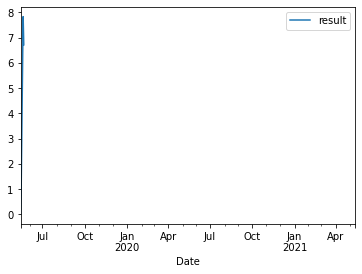

In [160]:
df2.plot('Date', 'result')